In [1]:
from trajectory_pairwise_similarity_dataset import *

In [2]:
import networkx as nx

In [3]:
dataset='brightkite'

In [4]:
k=3

In [5]:
k_core=nx.read_adjlist(f'k_cores/{dataset}/{k}')

In [6]:
trajectory_pairwise_similarity_dataset=TrajectoryPairwiseSimilarityDataset(
    k_core.nodes,
    f'pairwise_similarities/{dataset}'
)

In [7]:
import math

In [8]:
import glob

In [9]:
import os

In [10]:
import os.path

In [11]:
detected_communities_filepath_list = glob.glob(f'detected_communities/{dataset}/{k}/*')

In [12]:
m_values = [
    int(string_value)
    for string_value in os.listdir(f'detected_communities/{dataset}/{k}')
]

In [13]:
m_values_to_detected_communities = {}

for m_value in sorted(m_values):
    detected_community = nx.read_adjlist(f'detected_communities/{dataset}/{k}/{m_value}')
    if len(detected_community.nodes):
        m_values_to_detected_communities[m_value] = detected_community

In [14]:
m_values_to_detected_communities[math.inf] = k_core

In [15]:
m_values_to_detected_communities

{4: <networkx.classes.graph.Graph at 0x7f9e26297f10>,
 6: <networkx.classes.graph.Graph at 0x7f9e26297f50>,
 8: <networkx.classes.graph.Graph at 0x7f9e26297f90>,
 10: <networkx.classes.graph.Graph at 0x7f9e262946d0>,
 12: <networkx.classes.graph.Graph at 0x7f9e25c1d410>,
 14: <networkx.classes.graph.Graph at 0x7f9e25b748d0>,
 16: <networkx.classes.graph.Graph at 0x7f9e25a17d50>,
 18: <networkx.classes.graph.Graph at 0x7f9e258fab10>,
 20: <networkx.classes.graph.Graph at 0x7f9e25715510>,
 22: <networkx.classes.graph.Graph at 0x7f9e2555df50>,
 24: <networkx.classes.graph.Graph at 0x7f9e25351190>,
 26: <networkx.classes.graph.Graph at 0x7f9e25171a50>,
 28: <networkx.classes.graph.Graph at 0x7f9e24f36e10>,
 inf: <networkx.classes.graph.Graph at 0x7f9e267dc2d0>}

In [16]:
import matplotlib.pyplot as plt

In [17]:
import itertools

In [18]:
import array

In [19]:
import numpy as np

In [20]:
m_values_to_pairwise_similarities = {
    m_value: 
    np.fromiter(
        (
            trajectory_pairwise_similarity_dataset.pairwise_similarity(first_vertex, second_vertex)
            for connected_component in nx.connected_components(
                detected_community
            )
            for first_vertex, second_vertex in itertools.combinations(
                connected_component,
                2
            )
        ),
        float
    )
    for m_value, detected_community
    in m_values_to_detected_communities.items()
}

In [21]:
for m_value in m_values_to_pairwise_similarities:
    m_values_to_pairwise_similarities[m_value] **= 0.5

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e226f5890>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e226f5f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e22c6da90>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9e22706610>,
 'fliers': [],
 'means': []}

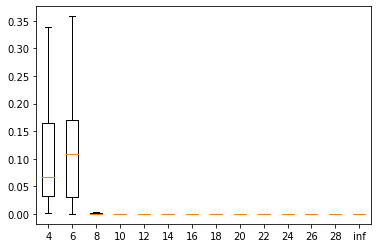

In [22]:
figure, axes=plt.subplots()

axes.boxplot(
    m_values_to_pairwise_similarities.values(),
    labels=m_values_to_pairwise_similarities.keys(),
    sym=''
)

In [23]:
figure.savefig(f'{dataset}-{k}-m_values_to_pairwise_similarities.pdf')